# Support Vector Machines (SVMs)

Support Vector Machines (SVM) are supervised learning algorithms used for classification, regression and outlier detection problems. 
Support vector machines are popular for handling non - linear relationships and high dimensional data. An important property of SVM is that the determination of model parameters corresponds to a convex optimization problem therefore any local solution is also a global optimum.

SVM was originally developed to solve classification task. The idea behind SVM is to find an optimal hyperplane in N-dimensions to separate data points from different classes. It is a discriminative classification where rather than modelling each class we a manifold which divides the classes from each other.

For illustration,let's take an example of two class classification problem where the classes are well separated

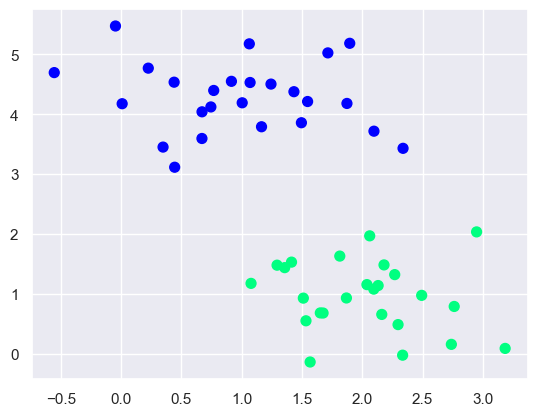

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)
plt.scatter(X[:,0], X[:,1], c =y, s =50, cmap = 'winter')

In the above plot if you see the two classes can be separated by a simple linear classifier by drawing a straight line, but here is the problem there are more than one possible dividing lines that can very well discriminate the two classes as shown below

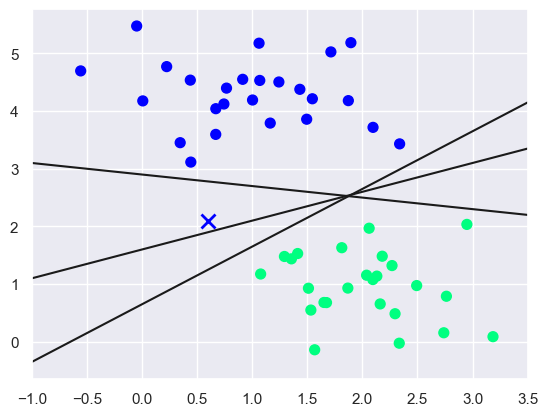

In [13]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.plot([0.6], [2.1], 'x', color='blue', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which perfectly classify these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! So may be we need to think a bit deeper

## Support Vector Machines(SVMs) - Maximum Margins

Now the intuition here is to draw a line to separate the two classes but then which line to choose is the question.We need a straight line to put widest street between the two classes to separate them which is why it is called widest possible approach or maximum margin classifier. So instead of taking a zero width line we draw a margin around the line of some width upto the nearest point. Check out the below example

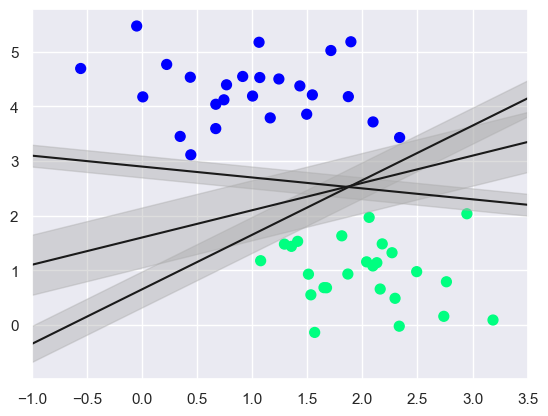

In [15]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0],X[:,1], c =y, s = 50, cmap = 'winter')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

If you see in the above figure the line which maximises the margin/ street between two classes will be chosen as the optimal model. 

### Fitting a Support Vector Machine (SVM)